In [42]:
import numpy as np

string = "1> Wall Clock Time elasped for all [784] out of [784] (100.0 %) workers to conclude [8911]!n1> ------------- Completed push_sum - twoDImperfect - 800 ACTORS----------------------------------------------"

In [68]:
import re
import pandas as pd
import numpy as np

In [54]:
matches = re.findall(pattern=r'\[([0-9]+)\]', string=string)

In [57]:
[converged, spawned, time] = map(int, matches)

In [58]:
print(converged, spawned, time)

784 784 8911


In [136]:
report_file = './report.out'

report = []

with open(report_file, mode='r') as fp:
    report_lines = [line for line in fp.readlines() if 'Wall Clock Time' in line]

    for report_line in report_lines:
        report.append(list(map(int, re.findall(pattern=r'\[([0-9]+)\]', string=report_line))))

algorithms = ['Gossip', 'Push Sum']
Topologies = ['full', 'line', 'twoD', 'twoDImperfect']
actor_counts = [100, 200, 400, 800, 1600]

time_desc = ['Time [ms]']
conv_desc = ['Convergence [%]']

report_iterator = 0

time_data, conv_data = [], []

for algorithm in algorithms:
    for topology in Topologies:
        time, conv = [], []
        for actor in actor_counts:
            assert len(report[report_iterator]) == 3
            conv.append(report[report_iterator][0] / report[report_iterator][1] * 100)
            time.append(report[report_iterator][2])

            report_iterator += 1

        time_data.append(time)
        conv_data.append(conv)

time_df = pd.DataFrame(data=np.array(time_data).T, index=actor_counts, columns=pd.MultiIndex.from_product([algorithms, Topologies, time_desc]))

conv_df = pd.DataFrame(data=np.array(conv_data).T, index=actor_counts, columns=pd.MultiIndex.from_product([algorithms, Topologies, conv_desc]))

time_df.head()

Gossip                                    Push Sum            \
          full      line      twoD twoDImperfect      full      line   
     Time [ms] Time [ms] Time [ms]     Time [ms] Time [ms] Time [ms]   
100        729       686       103            45      3530     14312   
200        502      1128       301           202      3531     16948   
400        930      5004       464            88      6620     22844   
800        959     10539       977           284      6338     15711   
1600      1391     17207      2003           610      6535     18809   

                              
          twoD twoDImperfect  
     Time [ms]     Time [ms]  
100       8075          6037  
200      12793          6637  
400       8262          8212  
800     119215          8911  
1600     17513         10705

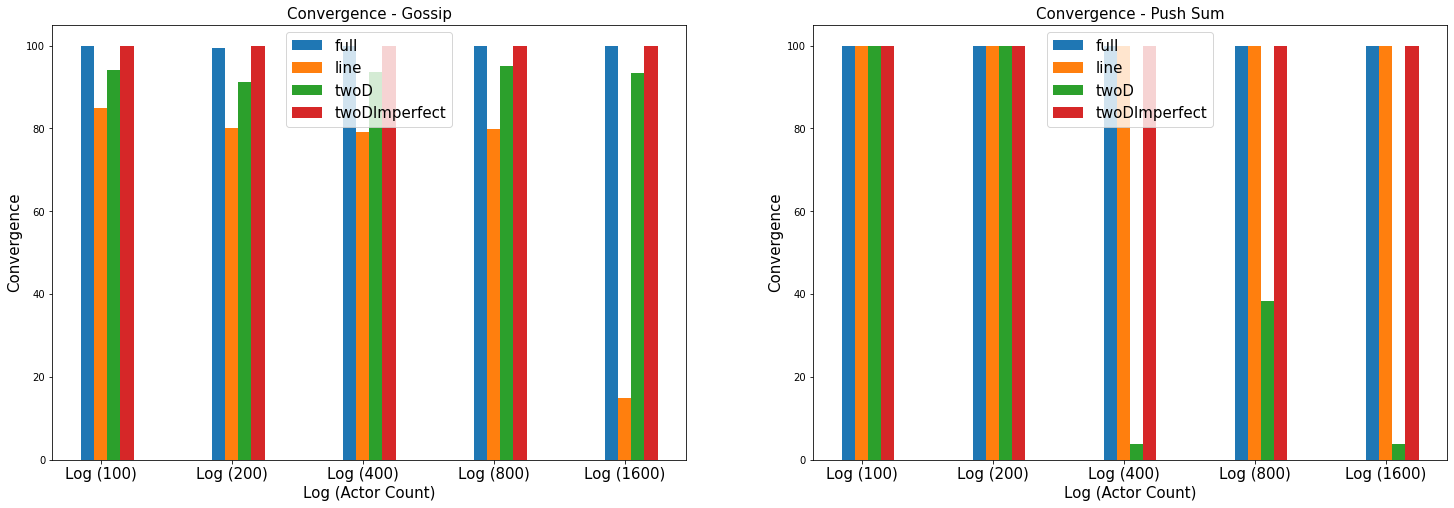

In [132]:
import matplotlib.pyplot as plt

plt.figure(figsize=(25, 8))

plt.subplot(1, 2, 1)

barwidth = 0.1

plt.title('Convergence - Gossip', fontsize = 15)
plt.bar(np.log2(actor_counts) - barwidth, conv_df['Gossip']['full']['Convergence [%]'], label = 'full', width=barwidth)
plt.bar(np.log2(actor_counts) , conv_df['Gossip']['line']['Convergence [%]'], label = 'line', width=barwidth)
plt.bar(np.log2(actor_counts) + barwidth, conv_df['Gossip']['twoD']['Convergence [%]'], label = 'twoD', width=barwidth)
plt.bar(np.log2(actor_counts) + 2 * barwidth, conv_df['Gossip']['twoDImperfect']['Convergence [%]'], label = 'twoDImperfect', width=barwidth)
plt.xlabel('Log (Actor Count)', fontsize = 15)
plt.ylabel('Convergence', fontsize = 15)
plt.xticks(np.log2(actor_counts), [f"Log ({i})" for i in actor_counts], fontsize=15)
plt.legend(fontsize = 15)

plt.subplot(1, 2, 2)

plt.title('Convergence - Push Sum', fontsize = 15)
plt.bar(np.log2(actor_counts) - barwidth, conv_df['Push Sum']['full']['Convergence [%]'], label = 'full', width=barwidth)
plt.bar(np.log2(actor_counts) , conv_df['Push Sum']['line']['Convergence [%]'], label = 'line', width=barwidth)
plt.bar(np.log2(actor_counts) + barwidth, conv_df['Push Sum']['twoD']['Convergence [%]'], label = 'twoD', width=barwidth)
plt.bar(np.log2(actor_counts) + 2 * barwidth, conv_df['Push Sum']['twoDImperfect']['Convergence [%]'], label = 'twoDImperfect', width=barwidth)
plt.xlabel('Log (Actor Count)', fontsize = 15)
plt.ylabel('Convergence', fontsize = 15)
plt.xticks(np.log2(actor_counts), [f"Log ({i})" for i in actor_counts], fontsize=15)
plt.legend(fontsize = 15)

plt.show()


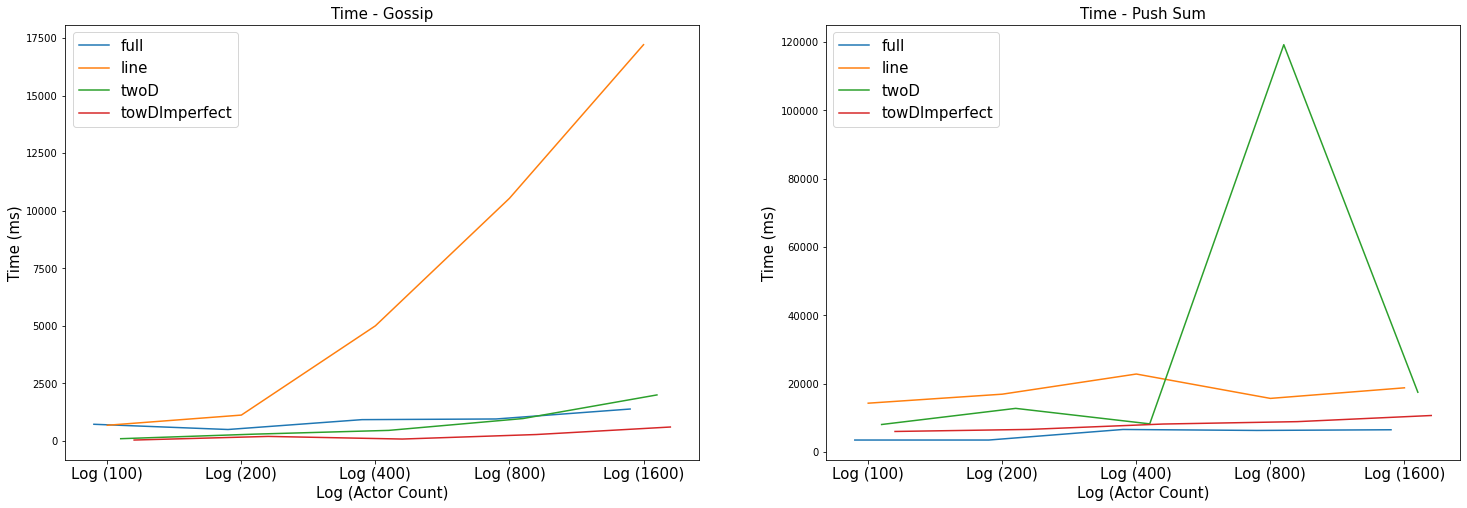

In [135]:
import matplotlib.pyplot as plt

plt.figure(figsize=(25, 8))

plt.subplot(1, 2, 1)

barwidth = 0.1

plt.title('Time - Gossip', fontsize = 15)
plt.plot(np.log2(actor_counts) - barwidth, time_df['Gossip']['full']['Time [ms]'], label = 'full')
plt.plot(np.log2(actor_counts) , time_df['Gossip']['line']['Time [ms]'], label = 'line')
plt.plot(np.log2(actor_counts) + barwidth, time_df['Gossip']['twoD']['Time [ms]'], label = 'twoD')
plt.plot(np.log2(actor_counts) + 2 * barwidth, time_df['Gossip']['twoDImperfect']['Time [ms]'], label = 'towDImperfect')
plt.xlabel('Log (Actor Count)', fontsize = 15)
plt.ylabel('Time (ms)', fontsize = 15)
plt.xticks(np.log2(actor_counts), [f"Log ({i})" for i in actor_counts], fontsize=15)
plt.legend(fontsize = 15)

plt.subplot(1, 2, 2)

plt.title('Time - Push Sum', fontsize = 15)
plt.plot(np.log2(actor_counts) - barwidth, time_df['Push Sum']['full']['Time [ms]'], label = 'full')
plt.plot(np.log2(actor_counts) , time_df['Push Sum']['line']['Time [ms]'], label = 'line')
plt.plot(np.log2(actor_counts) + barwidth, time_df['Push Sum']['twoD']['Time [ms]'], label = 'twoD')
plt.plot(np.log2(actor_counts) + 2 * barwidth, time_df['Push Sum']['twoDImperfect']['Time [ms]'], label = 'towDImperfect')
plt.xlabel('Log (Actor Count)', fontsize = 15)
plt.ylabel('Time (ms)', fontsize = 15)
plt.xticks(np.log2(actor_counts), [f"Log ({i})" for i in actor_counts], fontsize=15)
plt.legend(fontsize = 15)

plt.show()